In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC

from ipynb.fs.full.Functions import load_train_test_data, model_eval, run_gridsearchCV, load_model

# RBF-SVM with 1-1 
## Only 6 parameters
According to paper 4: Luengo et al. (2005). "Automatic Emotion Recognition using Prosodic Parameters"

In [2]:
# load the data
df = pd.read_pickle('../results/df_prep_numerical_only.pkl')
df.columns

Index(['duration', 'mean', 'median', 'max', 'min', 'var', 'std',
       'speaking_rate', 'articulation_rate', 'asd',
       ...
       'lpcmfccs_local9_min', 'lpcmfccs_local10_mean', 'lpcmfccs_local10_var',
       'lpcmfccs_local10_max', 'lpcmfccs_local10_min', 'lpcmfccs_local11_mean',
       'lpcmfccs_local11_var', 'lpcmfccs_local11_max', 'lpcmfccs_local11_min',
       'label'],
      dtype='object', length=250)

In [3]:
# selection of features (mean pitch, mean energy, pitch variance, skew of logarithmic pitch, range of logarithmic pitch,
# range of logarithmic energy)
df6param = df[['label','pitch_mean', 'pitch_var', 'energy_mean', 'skew_log_pitch', 'range_log_pitch', 'range_log_energy']].copy()
df6param.head()

,label,pitch_mean,pitch_var,energy_mean,skew_log_pitch,range_log_pitch,range_log_energy
0,4,-0.741135,-0.527264,-0.181987,-0.296694,-0.600449,0.125001
1,5,-1.386939,-1.070989,0.237872,-0.198081,-1.185553,0.125309
2,0,-0.448158,-0.159707,0.165869,-0.030373,-0.662848,0.131056
3,4,0.445340,0.432260,0.621608,-0.401886,-0.186604,0.114911
4,5,-1.177707,-1.082482,1.031302,-0.559679,-1.360023,0.112277


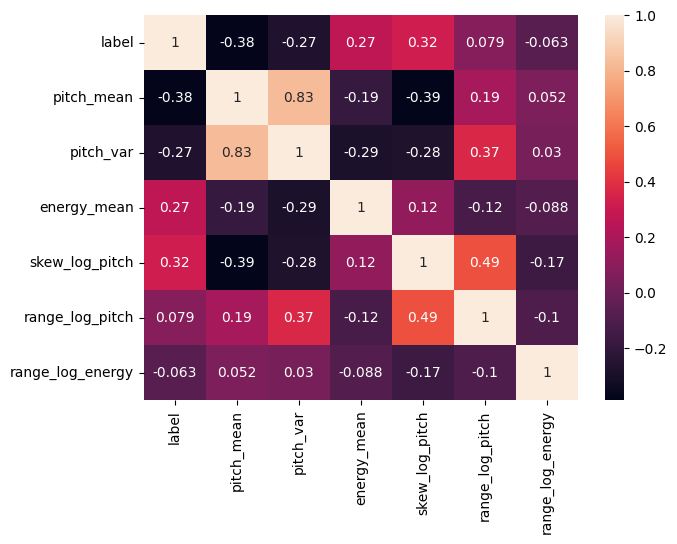

In [4]:
# look at the correlation of the data
plt.figure(figsize=(7,5))
sns.heatmap(df6param.corr(), annot=True)
plt.show()

We can see that *pitch_var* and *pitch_mean* show a highl positive correlation. *skew_log_pitch* and *range_log_pitch* are also positively correlated. 

In [5]:
# Load the train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df6param)

A snippet of the training data:


,pitch_mean,pitch_var,energy_mean,skew_log_pitch,range_log_pitch,range_log_energy
241,-1.455074,-1.205638,1.184469,-0.294200,-1.483766,-0.154248
364,-0.605954,-0.620878,-1.575339,0.617414,1.926389,0.103658
209,-0.629998,-0.598067,-1.598139,0.587535,0.091817,0.130748
430,0.611862,0.207716,-0.070193,-0.201563,-0.204404,0.130406
309,0.686027,0.723976,0.775073,-0.145928,-0.511626,0.113201


There are 454 entries with 6 columns in the training data.
There are 81 entries with 6 columns in the testing data.


In [6]:
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', decision_function_shape='ovo', gamma=0.1)


Evaluation: f1_score
54.62% for the train data
45.24% for the test data

Evaluation: accuracy_score
55.95% for the train data
48.15% for the test data

Evaluation: precision_score
57.07% for the train data
47.20% for the test data

Evaluation: recall_score
55.09% for the train data
48.13% for the test data

Evaluation: confusion_matrix of test predictions


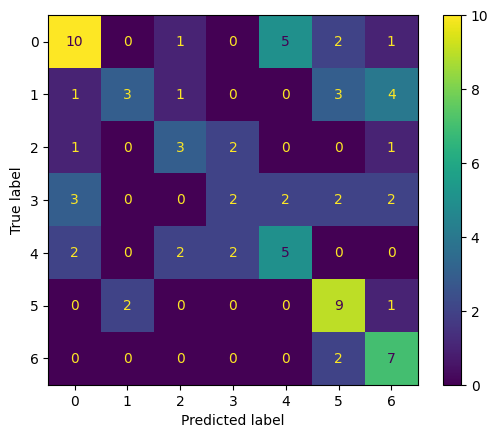


Hard cases for the model:

Label: anger(0)
Hard cases of false negatives: ['happiness(4)']

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)', 'sadness(6)']
Hard cases of false positives: ['neutral(5)']

Label: disgust(2)
Hard cases of false negatives: ['fear(3)']
Hard cases of false positives: ['happiness(4)']

Label: fear(3)
Hard cases of false negatives: ['anger(0)']
Hard cases of false positives: ['disgust(2)', 'happiness(4)']

Label: happiness(4)
Hard cases of false positives: ['anger(0)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['boredom(1)']



In [7]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True)

A snippet of the training data:


,pitch_mean,energy_mean,range_log_pitch,range_log_energy
241,-1.455074,1.184469,-1.483766,-0.154248
364,-0.605954,-1.575339,1.926389,0.103658
209,-0.629998,-1.598139,0.091817,0.130748
430,0.611862,-0.070193,-0.204404,0.130406
309,0.686027,0.775073,-0.511626,0.113201


There are 454 entries with 4 columns in the training data.
There are 81 entries with 4 columns in the testing data.

Evaluation: f1_score
40.52% for the train data
31.60% for the test data

Evaluation: accuracy_score
42.51% for the train data
34.57% for the test data

Evaluation: precision_score
40.85% for the train data
32.98% for the test data

Evaluation: recall_score
40.81% for the train data
33.25% for the test data

Evaluation: confusion_matrix of test predictions


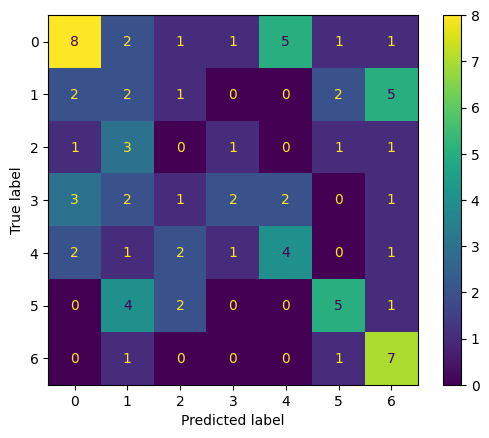


Hard cases for the model:

Label: anger(0)
Hard cases of false negatives: ['happiness(4)']

Label: boredom(1)
Hard cases of false negatives: ['sadness(6)']
Hard cases of false positives: ['neutral(5)']

Label: disgust(2)
Hard cases of false negatives: ['boredom(1)']
Hard cases of false positives: ['happiness(4)', 'neutral(5)']

Label: fear(3)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false positives: ['anger(0)']

Label: neutral(5)
Hard cases of false negatives: ['boredom(1)']

Label: sadness(6)
Hard cases of false positives: ['boredom(1)']



In [8]:
# drop correlated features and run again
df6param_uncor = df6param.drop(columns=['pitch_var', 'skew_log_pitch'])
# Load the train/test data
X_train_uncor, X_test_uncor, y_train_uncor, y_test_uncor = load_train_test_data(df6param_uncor)
svm_model.fit(X_train_uncor, y_train_uncor)
model_eval(svm_model, X_train_uncor, X_test_uncor, y_train_uncor, y_test_uncor, confusion=True)

Actually performs worse when dropping these features. 
Next, we try to boost this very simple model with a gridsearch.

### Hyperparameter Optimization

In [13]:
# define the grid for the hyperparameter search
grid_vals = { 'C': [0.01, 0.1, 1, 10], 
            'gamma': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'class_weight': ['balanced', None], 
            'decision_function_shape': ['ovo', 'ovr']
            }
run_gridsearchCV(svm_model, grid_vals, X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_we

[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=poly; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=poly; total time=   0.8s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=linea

[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=poly; total time=   0.2s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=poly; total time=   0.5s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=poly; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=poly; total time=   0.4s
[CV] END C=0.01, class_weight=balanced, decision_function_shape=ovr, gamma=10, kernel=poly; total time=   0.7s
[CV] 

[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=poly; total time=   0.5s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=poly; total time=   0.5s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovo, gamma=10, kernel=poly; total time=   0.7s
[CV] END C=0.01, class_weight=None, deci

[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=None, decision_function_shape=ovr, gamma=10, kernel=poly; total time=   0.4s
[CV] END C=0.01, class_weight=None, 

[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=linear; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=10, kernel=linear; total time=

[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=sigmoid; total time=   0.0s
[CV]

[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_sh

[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=None, decision_function_shape=o

[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balance

[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class

[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovo, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shap

[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=1, class_weight=None, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=None, decision_functio

[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=linear; total time=   0.0

[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=linear; total time=   

[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovo, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, deci

[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=None, decision_function_shape=ovr, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=None, decision_fun


Evaluation: f1_score
51.11% for the train data
43.39% for the test data

Evaluation: accuracy_score
51.54% for the train data
44.44% for the test data

Evaluation: precision_score
51.58% for the train data
44.66% for the test data

Evaluation: recall_score
52.37% for the train data
45.83% for the test data

Evaluation: confusion_matrix of test predictions


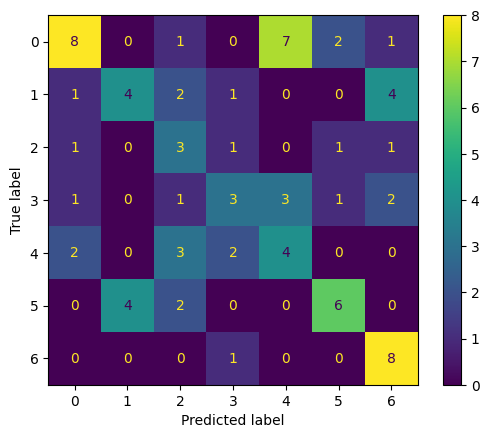


Hard cases for the model:

Label: anger(0)
Hard cases of false negatives: ['happiness(4)']

Label: boredom(1)
Hard cases of false negatives: ['sadness(6)']
Hard cases of false positives: ['neutral(5)']

Label: disgust(2)
Hard cases of false positives: ['happiness(4)']

Label: fear(3)
Hard cases of false negatives: ['happiness(4)']
Hard cases of false positives: ['happiness(4)']

Label: happiness(4)
Hard cases of false negatives: ['disgust(2)']
Hard cases of false positives: ['anger(0)', 'fear(3)']

Label: neutral(5)
Hard cases of false negatives: ['boredom(1)']

Label: sadness(6)
Hard cases of false positives: ['boredom(1)']



In [14]:
svm_best_model = load_model(svm_model, 'f1_macro')
model_eval(svm_best_model,X_train, X_test, y_train, y_test, confusion=True)

# SVM 
###  Shen et al. (2011) "Automatic Speech Emotion Recognition Using Support Vector Machine" (Paper 3)

In [2]:
# load the data
df = pd.read_pickle('../results/df_prep_numerical_only.pkl')
df.columns

Index(['duration', 'mean', 'median', 'max', 'min', 'var', 'std',
       'speaking_rate', 'articulation_rate', 'asd',
       ...
       'lpcmfccs_local9_min', 'lpcmfccs_local10_mean', 'lpcmfccs_local10_var',
       'lpcmfccs_local10_max', 'lpcmfccs_local10_min', 'lpcmfccs_local11_mean',
       'lpcmfccs_local11_var', 'lpcmfccs_local11_max', 'lpcmfccs_local11_min',
       'label'],
      dtype='object', length=250)

In [3]:
# selection of features: 
# energy features (19-dim), pitch features (19-dim), LPCCs (48-dim), MFCCs (52-dim), LPCMFCCs (48-dim) 
# -> 186 features + label
df_3 = df.filter(regex='energy_|pitch_|lpccs_|^mfccs|lpcmfccs_|label')
df_3.columns

Index(['energy_max', 'energy_mean', 'energy_var', 'energy_rising_duration_max',
       'energy_rising_duration_mean', 'energy_rising_duration_median',
       'energy_rising_duration_iqr', 'energy_falling_duration_max',
       'energy_falling_duration_mean', 'energy_falling_duration_median',
       ...
       'lpcmfccs_local9_min', 'lpcmfccs_local10_mean', 'lpcmfccs_local10_var',
       'lpcmfccs_local10_max', 'lpcmfccs_local10_min', 'lpcmfccs_local11_mean',
       'lpcmfccs_local11_var', 'lpcmfccs_local11_max', 'lpcmfccs_local11_min',
       'label'],
      dtype='object', length=187)

In [6]:
# load the train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_3)

A snippet of the training data:


,energy_max,energy_mean,energy_var,energy_rising_duration_max,energy_rising_duration_mean,energy_rising_duration_median,energy_rising_duration_iqr,energy_falling_duration_max,energy_falling_duration_mean,energy_falling_duration_median,...,lpcmfccs_local9_max,lpcmfccs_local9_min,lpcmfccs_local10_mean,lpcmfccs_local10_var,lpcmfccs_local10_max,lpcmfccs_local10_min,lpcmfccs_local11_mean,lpcmfccs_local11_var,lpcmfccs_local11_max,lpcmfccs_local11_min
241,0.109759,1.184469,1.719364,-0.317983,-1.221313,-1.011377,-0.026398,-0.931386,-0.958430,-0.022437,...,-0.308694,0.084472,0.271426,-0.218007,-0.057589,0.313795,0.267861,-0.227202,-0.111190,0.307516
364,-0.957895,-1.575339,-1.830023,-0.317983,-1.094613,-0.403414,-0.297992,-1.288073,-0.602240,0.609351,...,0.711811,-0.075413,-0.780710,-0.043641,0.130479,-0.665620,-0.891269,-0.010428,0.017714,-0.722238
209,-0.957895,-1.598139,-1.561260,-0.790542,-0.346797,0.812510,-0.841179,-1.288073,-0.941656,0.609351,...,1.255242,0.065525,-0.731827,0.102518,-0.035001,-1.208029,-0.794909,0.149507,-0.097226,-1.265853
430,-0.957895,-0.070193,-0.489470,-1.263100,-0.811046,0.812510,-0.297992,-1.288073,-0.852198,0.609351,...,-0.570754,-0.120425,0.484469,-0.230758,0.181230,0.541156,0.519439,-0.246612,0.057740,0.577385
309,2.245066,0.775073,0.472092,1.099692,-0.354158,-0.403414,1.331571,-1.288073,-1.393016,-1.917803,...,-0.591040,0.194870,0.515836,-0.230930,-0.206997,0.556228,0.565981,-0.247006,-0.185268,0.598848


There are 454 entries with 186 columns in the training data.
There are 81 entries with 186 columns in the testing data.


In [7]:
svm_model = SVC(kernel='rbf', C=1, gamma=0.1, class_weight='balanced', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', decision_function_shape='ovo', gamma=0.1)


Evaluation: f1_score
100.00% for the train data
5.43% for the test data

Evaluation: accuracy_score
100.00% for the train data
23.46% for the test data

Evaluation: precision_score
100.00% for the train data
3.35% for the test data

Evaluation: recall_score
100.00% for the train data
14.29% for the test data

Evaluation: confusion_matrix of test predictions


C:\Users\Kim-Carolin\anaconda3\envs\automatic_speech_emotion_recognition\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


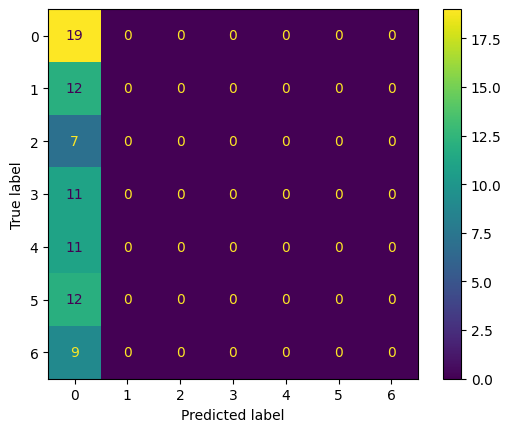


Hard cases for the model:

Label: boredom(1)
Hard cases of false negatives: ['anger(0)']

Label: disgust(2)
Hard cases of false negatives: ['anger(0)']

Label: fear(3)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false negatives: ['anger(0)']

Label: neutral(5)
Hard cases of false negatives: ['anger(0)']

Label: sadness(6)
Hard cases of false negatives: ['anger(0)']



In [8]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True)

In [9]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()


Evaluation: f1_score
94.13% for the train data
72.80% for the test data

Evaluation: accuracy_score
94.05% for the train data
74.07% for the test data

Evaluation: precision_score
95.06% for the train data
77.43% for the test data

Evaluation: recall_score
93.51% for the train data
71.12% for the test data

Evaluation: confusion_matrix of test predictions


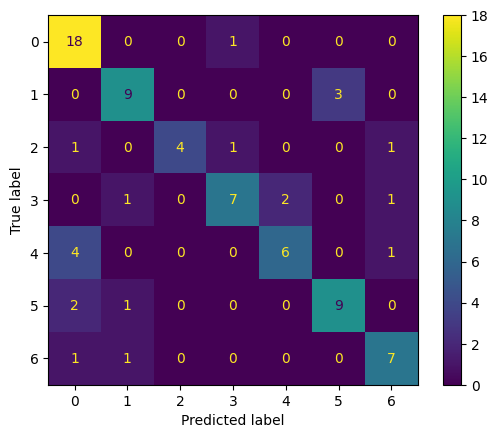


Hard cases for the model:

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)']

Label: happiness(4)
Hard cases of false negatives: ['anger(0)']
Hard cases of false positives: ['fear(3)']

Label: neutral(5)
Hard cases of false positives: ['boredom(1)']



In [10]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True)

### Try with 90-10 train-test split as in paper

In [11]:
# load the train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_3, test_size=0.1)

A snippet of the training data:


,energy_max,energy_mean,energy_var,energy_rising_duration_max,energy_rising_duration_mean,energy_rising_duration_median,energy_rising_duration_iqr,energy_falling_duration_max,energy_falling_duration_mean,energy_falling_duration_median,...,lpcmfccs_local9_max,lpcmfccs_local9_min,lpcmfccs_local10_mean,lpcmfccs_local10_var,lpcmfccs_local10_max,lpcmfccs_local10_min,lpcmfccs_local11_mean,lpcmfccs_local11_var,lpcmfccs_local11_max,lpcmfccs_local11_min
237,0.109759,0.171386,0.237628,0.627134,-0.605913,-1.619339,0.245196,0.852048,0.507574,-0.022437,...,-0.195091,0.181742,0.336446,-0.217264,-0.207184,0.209326,0.351303,-0.227112,-0.166875,0.191852
459,-0.957895,0.300091,-0.525615,-0.790542,-0.605913,-0.403414,-0.569585,-0.218012,-1.149648,-1.917803,...,-0.582417,0.199928,0.503072,-0.230901,-0.208053,0.550008,0.544656,-0.246933,-0.195199,0.589683
142,-0.957895,1.185660,0.922756,-0.317983,-0.315307,0.812510,-0.297992,-0.574699,-0.427269,-0.022437,...,0.576409,0.176065,-0.780526,0.008446,-0.190744,-0.532065,-0.872273,0.049954,-0.160583,-0.586427
148,0.109759,0.104880,-1.020438,1.099692,0.844674,-0.403414,-0.297992,1.922108,2.183007,0.609351,...,2.640015,0.174058,-2.495015,1.687736,-0.185442,-2.621600,-2.503976,1.818091,-0.169745,-2.643904
124,-0.957895,-1.492359,-1.505395,-0.790542,-0.034469,0.812510,-1.384366,0.138674,-0.639733,-0.654226,...,-0.036084,-0.445666,0.079640,-0.194174,0.541278,0.060275,0.040702,-0.196731,0.345734,0.030599


There are 481 entries with 186 columns in the training data.
There are 54 entries with 186 columns in the testing data.


In [12]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()


Evaluation: f1_score
93.33% for the train data
72.99% for the test data

Evaluation: accuracy_score
93.35% for the train data
74.07% for the test data

Evaluation: precision_score
94.40% for the train data
76.13% for the test data

Evaluation: recall_score
92.60% for the train data
72.23% for the test data

Evaluation: confusion_matrix of test predictions


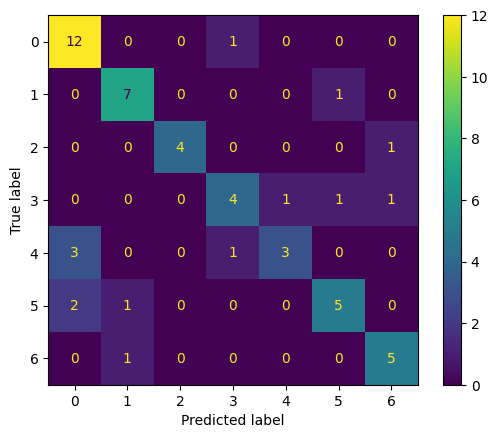


Hard cases for the model:

Label: happiness(4)
Hard cases of false negatives: ['anger(0)']
Hard cases of false positives: ['fear(3)']

Label: neutral(5)
Hard cases of false negatives: ['anger(0)']



In [13]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True)

The model is actually a bit better with a 85-15 train-test split. Just the hard cases change slightly.

### Try with 5 features only as in paper

In [4]:
# load the data
df_5emos = pd.read_pickle('../results/df_prep_5emos_numerical_only.pkl')

# selection of features
df_5emos = df_5emos.filter(regex='energy_|pitch_|lpccs_|^mfccs|lpcmfccs_|label')

# load the train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_5emos)

A snippet of the training data:


,energy_max,energy_mean,energy_var,energy_rising_duration_max,energy_rising_duration_mean,energy_rising_duration_median,energy_rising_duration_iqr,energy_falling_duration_max,energy_falling_duration_mean,energy_falling_duration_median,...,lpcmfccs_local9_max,lpcmfccs_local9_min,lpcmfccs_local10_mean,lpcmfccs_local10_var,lpcmfccs_local10_max,lpcmfccs_local10_min,lpcmfccs_local11_mean,lpcmfccs_local11_var,lpcmfccs_local11_max,lpcmfccs_local11_min
121,-0.959314,-0.341210,0.157216,0.089574,-0.213874,-0.346349,-0.382494,0.388276,-0.278035,-0.710346,...,1.327561,0.193975,-1.469343,0.404402,-0.199982,-1.292353,-1.568698,0.480893,-0.201294,-1.335401
211,0.173813,1.457029,-0.255004,0.089574,-0.518771,-0.346349,-0.382494,4.081847,0.995960,-0.710346,...,-0.626460,0.195514,0.494667,-0.249350,-0.200395,0.600694,0.522463,-0.265745,-0.175649,0.632186
214,0.173813,0.244975,0.202045,-0.384886,-0.636040,-0.346349,-0.923894,0.388276,-0.101635,0.527738,...,0.008417,0.192571,-0.220122,-0.138455,-0.200538,0.019050,-0.261147,-0.120346,-0.186933,-0.014594
317,0.173813,-1.746296,-1.320630,1.038493,1.122986,0.851736,-0.382494,0.388276,0.858760,0.527738,...,-0.269358,-0.213231,0.159834,-0.219431,0.290115,0.282554,0.140911,-0.223016,0.128936,0.266377
185,0.173813,0.127876,-0.651523,-0.859346,-0.453101,0.851736,-0.382494,-0.283283,-0.513234,0.527738,...,-0.626033,0.189301,0.513010,-0.249367,-0.199900,0.600355,0.551992,-0.265790,-0.190624,0.631739


There are 288 entries with 186 columns in the training data.
There are 51 entries with 186 columns in the testing data.


In [5]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()


Evaluation: f1_score
96.29% for the train data
84.92% for the test data

Evaluation: accuracy_score
95.83% for the train data
84.31% for the test data

Evaluation: precision_score
96.36% for the train data
84.92% for the test data

Evaluation: recall_score
96.25% for the train data
84.92% for the test data

Evaluation: confusion_matrix of test predictions


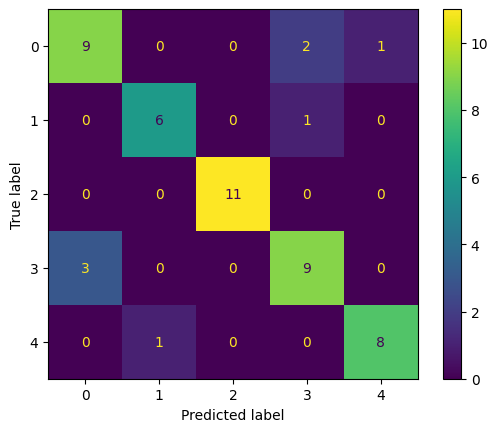


Hard cases for the model:

Label: boredom(0)
Hard cases of false positives: ['neutral(3)']

Label: neutral(3)
Hard cases of false negatives: ['boredom(0)']



In [6]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True, emotions='5emos')

Do the same with the 90-10 train-test split.

In [7]:
# load the train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_5emos, test_size=0.1)

A snippet of the training data:


,energy_max,energy_mean,energy_var,energy_rising_duration_max,energy_rising_duration_mean,energy_rising_duration_median,energy_rising_duration_iqr,energy_falling_duration_max,energy_falling_duration_mean,energy_falling_duration_median,...,lpcmfccs_local9_max,lpcmfccs_local9_min,lpcmfccs_local10_mean,lpcmfccs_local10_var,lpcmfccs_local10_max,lpcmfccs_local10_min,lpcmfccs_local11_mean,lpcmfccs_local11_var,lpcmfccs_local11_max,lpcmfccs_local11_min
102,2.440066,0.809484,0.662290,1.038493,1.221491,-0.346349,-1.465294,0.052496,1.627077,0.527738,...,0.220540,0.197275,-0.350249,-0.094845,-0.200153,-0.186488,-0.408133,-0.071523,-0.202954,-0.228190
53,-0.959314,0.613678,-0.366092,0.564033,-0.673290,-1.544435,0.700307,0.388276,-1.045890,-1.948430,...,-0.630595,0.122621,0.529800,-0.249467,-0.103445,0.603975,0.578454,-0.266005,-0.156017,0.636512
303,2.440066,1.530193,0.500537,-0.859346,0.384195,0.252694,0.158907,1.059834,1.956355,1.765822,...,0.155025,0.194212,-0.232478,-0.139021,-0.200809,-0.122690,-0.289573,-0.123887,-0.183898,-0.162291
24,-0.959314,-1.651078,-1.749471,0.564033,-1.466754,-1.544435,-0.382494,0.724055,-1.655087,-1.948430,...,-0.384799,0.078785,0.381732,-0.244781,-0.049103,0.389247,0.386225,-0.258489,-0.117118,0.383776
225,0.173813,-1.068863,-0.337114,-1.333805,-0.748617,-0.346349,-1.465294,-1.290620,-0.842512,0.527738,...,-0.248547,-3.239745,0.324050,-0.237815,3.395994,0.263107,0.318203,-0.249077,3.060619,0.245260


There are 305 entries with 186 columns in the training data.
There are 34 entries with 186 columns in the testing data.


In [8]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()


Evaluation: f1_score
96.69% for the train data
89.33% for the test data

Evaluation: accuracy_score
96.39% for the train data
88.24% for the test data

Evaluation: precision_score
96.93% for the train data
91.14% for the test data

Evaluation: recall_score
96.51% for the train data
88.50% for the test data

Evaluation: confusion_matrix of test predictions


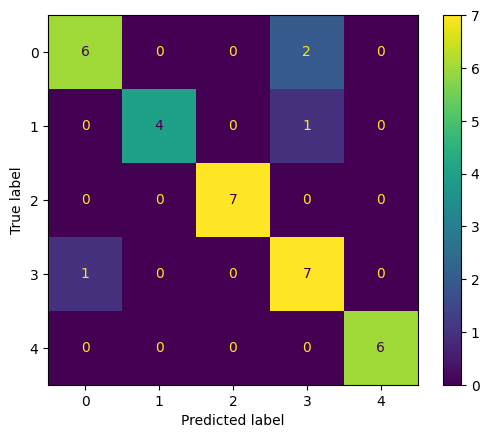


Hard cases for the model:

Label: boredom(0)
Hard cases of false negatives: ['neutral(3)']



In [10]:
model_eval(svm_model, X_train, X_test, y_train, y_test, confusion=True, emotions='5emos')

Finally, we see that the model is even better with 5 emotions only. In this case, a 90-10 train-test split event improves the performance slighty. Only with *boredom* and *neutral* it has a hard time. Neverthesless, we are interested in comparing models' perfomances across all 7 emotions in EmoDB which is why we will move on with this dataset (and a 85-15 train-test split) from now on.